In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Importing dataset
data = pd.read_csv('BankChurners.csv')

In [31]:
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [32]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [33]:
# number of data points & number of features
data.shape

(10127, 23)

In [34]:
#Informatio about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [35]:
# checking for missing values
data.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [36]:
# show first lines
display(data[:5])

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [37]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [38]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Attrition_Flag': ['Existing Customer', 'Attrited Customer'],
 'Gender': ['M', 'F'],
 'Education_Level': ['High School',
  'Graduate',
  'Uneducated',
  'Unknown',
  'College',
  'Post-Graduate',
  'Doctorate'],
 'Marital_Status': ['Married', 'Single', 'Unknown', 'Divorced'],
 'Income_Category': ['$60K - $80K',
  'Less than $40K',
  '$80K - $120K',
  '$40K - $60K',
  '$120K +',
  'Unknown'],
 'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum']}

In [39]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [40]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop last two columns (unneeded)
    df = df.drop(df.columns[-2:], axis=1)
    
    # Drop CLIENTNUM columns
    df = df.drop('CLIENTNUM', axis=1)
    
    # Encode unknown values as np.NaN
    df = df.replace('Unknown', np.NaN)
    
    # Fill ordinal missing values with modes (Education_Level and Income_Category columns)
    df['Education_Level'] = df['Education_Level'].fillna('Graduate')
    df['Income_Category'] = df['Income_Category'].fillna('Less than $40K')
    
    # Encode binary columns
    df = binary_encode(df, 'Attrition_Flag', positive_value='Attrited Customer')
    df = binary_encode(df, 'Gender', positive_value='M')
    
    # Encode ordinal columns
    education_ordering = [
        'Uneducated',
        'High School',
        'College',
        'Graduate',
        'Post-Graduate',
        'Doctorate'
    ]
    income_ordering = [
        'Less than $40K',
        '$40K - $60K',
        '$60K - $80K',
        '$80K - $120K',
        '$120K +'
    ]
    df = ordinal_encode(df, 'Education_Level', ordering=education_ordering)
    df = ordinal_encode(df, 'Income_Category', ordering=income_ordering)
    
    # Encode nominal columns
    df = onehot_encode(df, 'Marital_Status', prefix='MS')
    df = onehot_encode(df, 'Card_Category', prefix='CC')
    
    # Split df into X and y
    y = df['Attrition_Flag'].copy()
    X = df.drop('Attrition_Flag', axis=1).copy()
    
    # Scale X with a standard scaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y

In [42]:
X, y = preprocess_inputs(data)

In [43]:
X

,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,MS_Divorced,MS_Married,MS_Single,CC_Blue,CC_Gold,CC_Platinum,CC_Silver
0,-0.165406,1.059956,0.503368,-0.893680,0.597300,0.384621,0.763943,-1.327136,0.492404,0.446622,...,-0.973895,3.834003,-0.775882,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
1,0.333570,-0.943436,2.043199,0.593388,-0.887628,1.010715,1.407306,-1.327136,-0.411616,-0.041367,...,-1.357340,12.608573,-0.616276,-0.282405,-0.928214,1.252337,0.270611,-0.107644,-0.044484,-0.240794
2,0.583058,1.059956,0.503368,0.593388,1.339764,0.008965,0.120579,-1.327136,-2.219655,-0.573698,...,-1.911206,6.807864,-0.997155,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
3,-0.789126,-0.943436,1.273283,-0.893680,-0.887628,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,...,-1.911206,6.807864,1.759686,-0.282405,-0.928214,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
4,-0.789126,1.059956,0.503368,-1.637214,0.597300,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,...,-1.570365,7.509325,-0.997155,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,1.059956,-0.266547,0.593388,-0.145164,0.509840,-0.522785,-0.337598,0.492404,-0.509330,...,2.221481,0.608119,0.678714,-0.282405,-0.928214,1.252337,0.270611,-0.107644,-0.044484,-0.240794
10123,-0.664382,1.059956,-0.266547,0.593388,-0.145164,-1.368442,0.120579,-0.337598,0.492404,-0.479181,...,0.176440,-0.122745,0.856458,3.541013,-0.928214,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
10124,-0.290150,-0.943436,-1.036462,-0.893680,-0.887628,0.008965,0.763943,0.651940,1.396424,-0.354626,...,-0.207005,0.444305,-0.997155,-0.282405,1.077338,-0.798507,0.270611,-0.107644,-0.044484,-0.240794
10125,-2.036565,1.059956,-0.266547,0.593388,-0.145164,0.008965,0.120579,0.651940,0.492404,-0.368710,...,-0.121795,0.041070,-0.997155,-0.282405,-0.928214,-0.798507,0.270611,-0.107644,-0.044484,-0.240794


In [44]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

#Expolatory Data Analysis


In [45]:
# Excluding categorical columns
eda_df = pd.concat([X.loc[:, ['Customer_Age', 'Months_on_book']], X.loc[:,'Credit_Limit':'Avg_Utilization_Ratio']], axis=1).copy()

In [46]:
eda_df

,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.165406,0.384621,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,0.333570,1.010715,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0.583058,0.008965,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,-0.789126,-0.241473,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-0.789126,-1.869317,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155
...,...,...,...,...,...,...,...,...,...,...
10122,0.458314,0.509840,-0.509330,0.844455,-0.584929,-0.259771,3.259358,2.221481,0.608119,0.678714
10123,-0.664382,-1.368442,-0.479181,1.255524,-0.591639,0.201004,1.283475,0.176440,-0.122745,0.856458
10124,-0.290150,0.008965,-0.354626,-1.426858,-0.226632,0.269436,1.732994,-0.207005,0.444305,-0.997155
10125,-2.036565,0.008965,-0.368710,-1.426858,-0.240713,-1.026208,1.174848,-0.121795,0.041070,-0.997155


Univariate Visualization

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

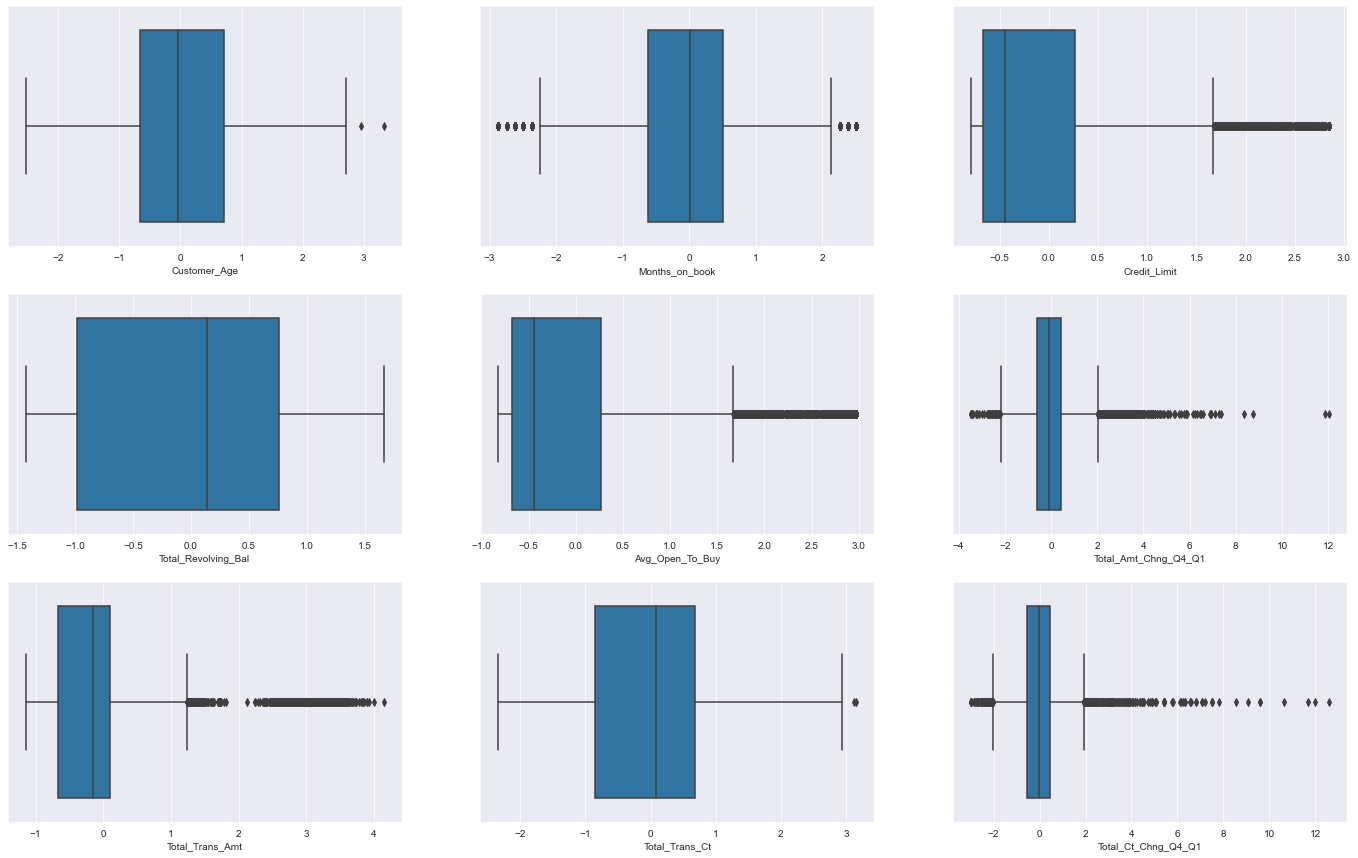

In [47]:
plt.figure(figsize=(24, 15))

for i in range(len(eda_df.columns) - 1):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(eda_df[eda_df.columns[i]])

plt.show()

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

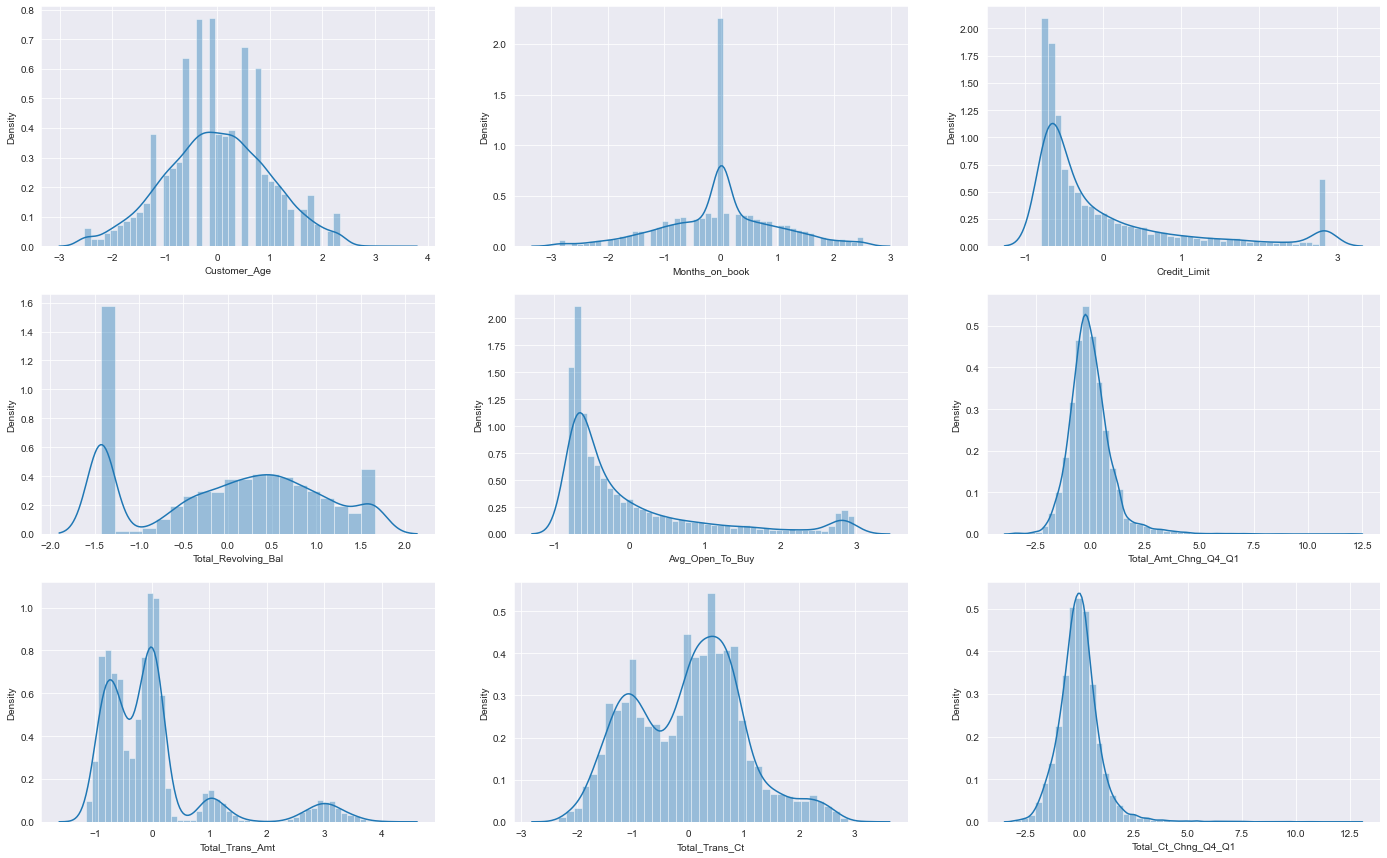

In [48]:
plt.figure(figsize=(24, 15))

for i in range(len(eda_df.columns) - 1):
    plt.subplot(3, 3, i + 1)
    sns.distplot(eda_df[eda_df.columns[i]])

plt.show()

Multivariate Visualization

<Figure size 1440x1440 with 0 Axes>

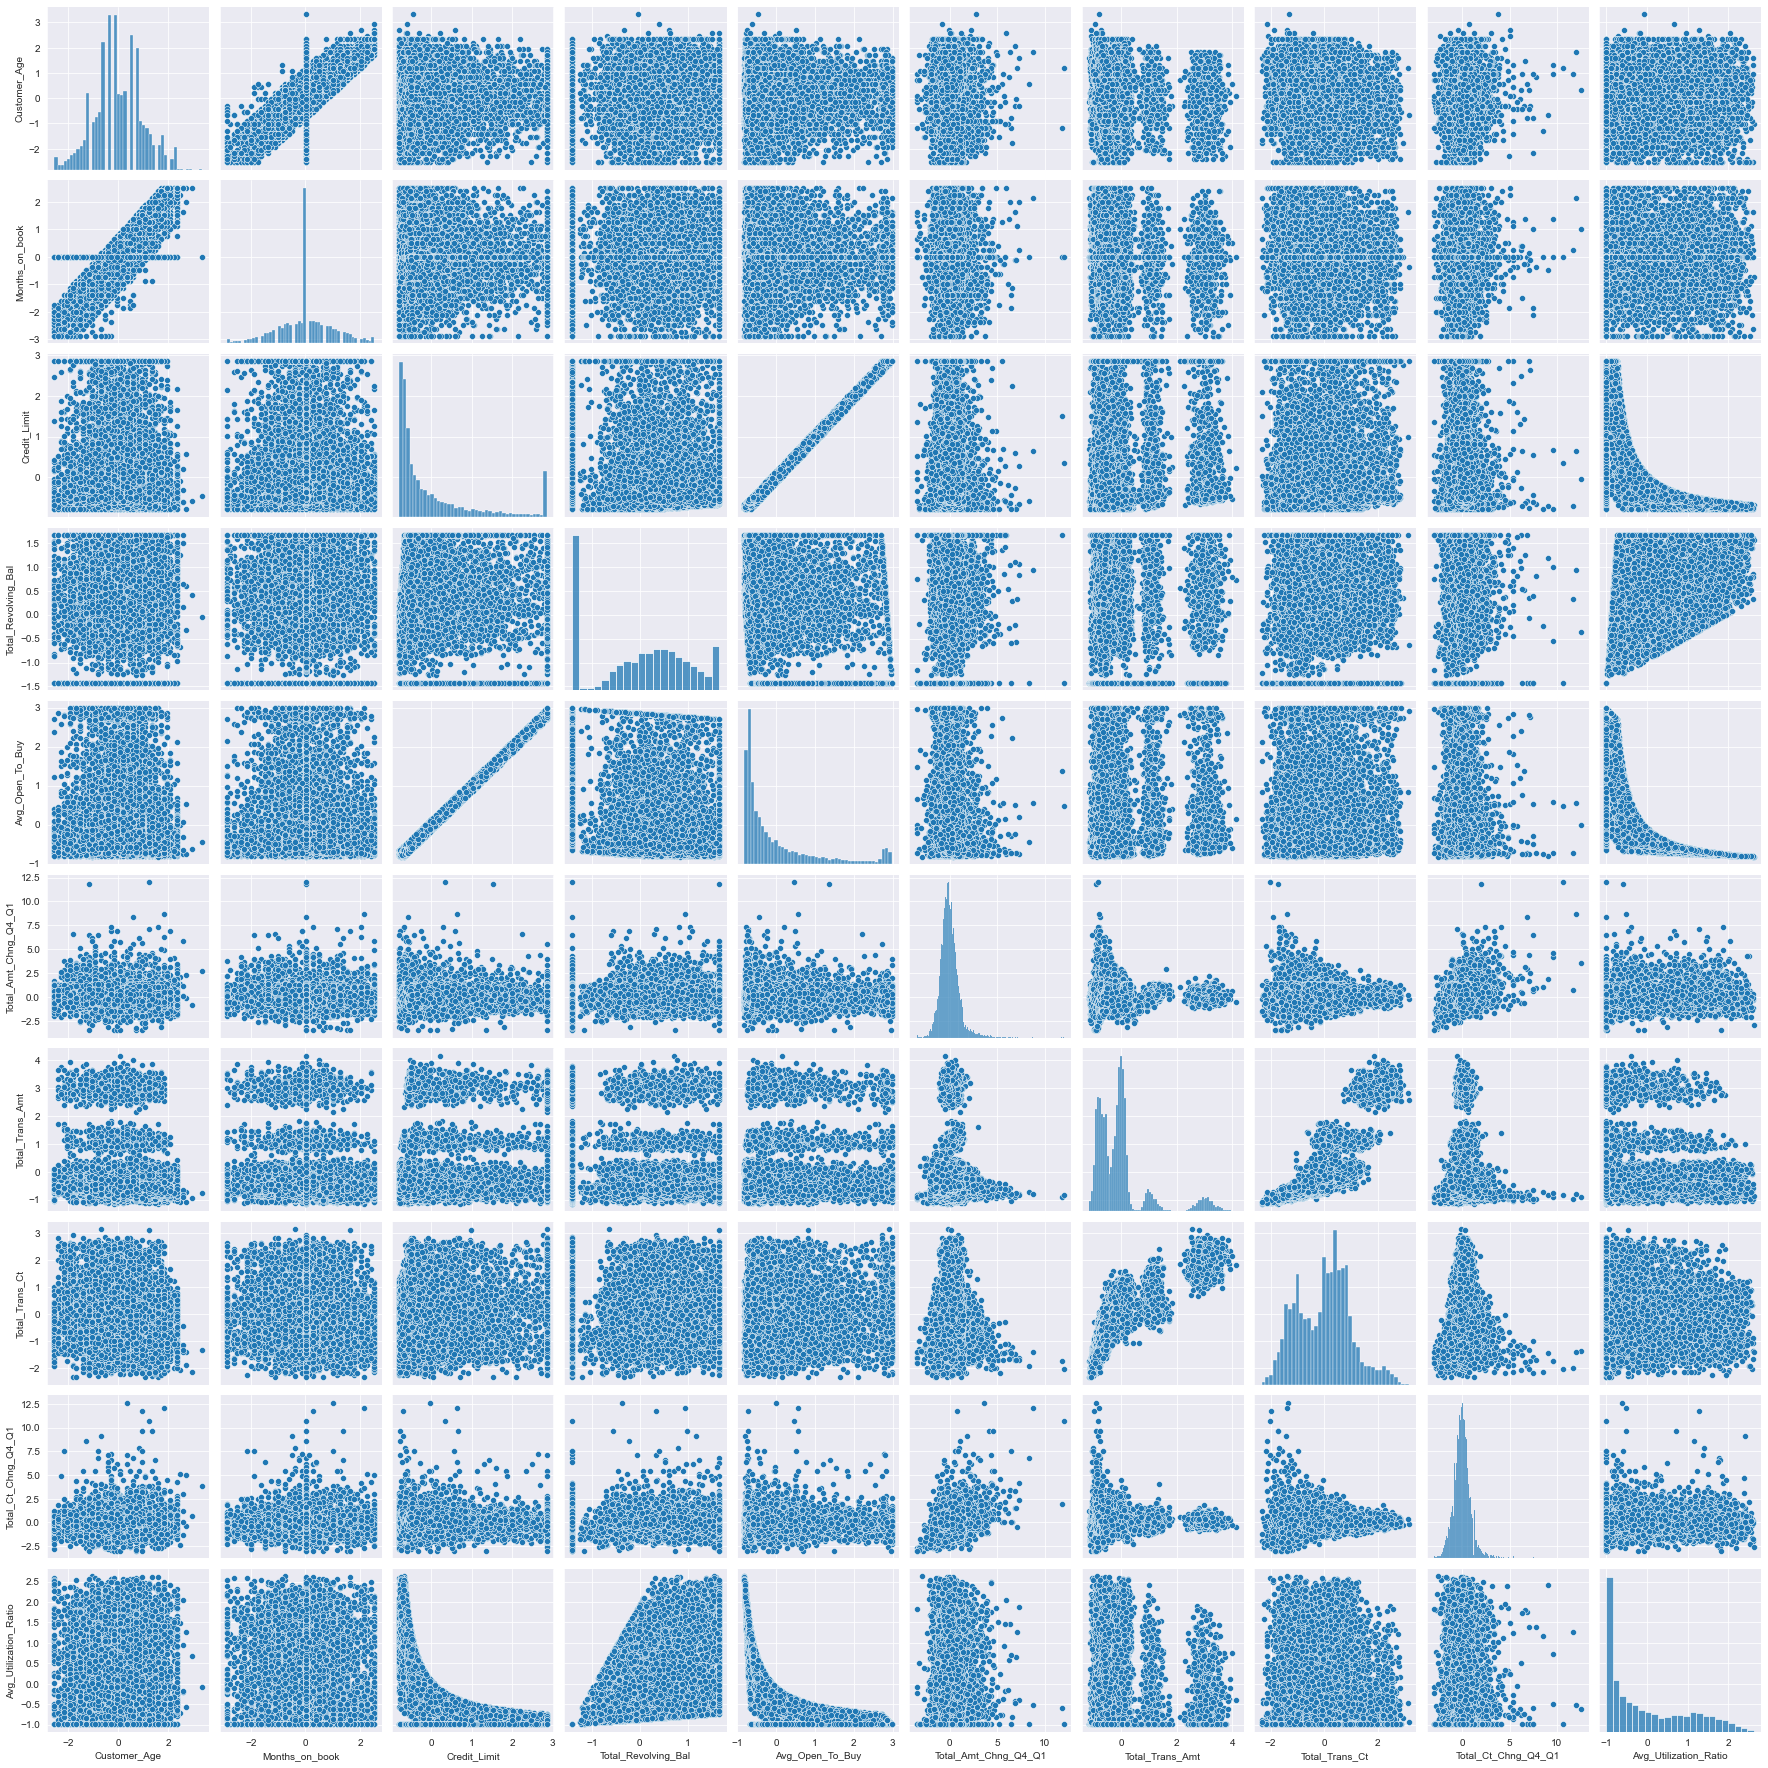

In [49]:
plt.figure(figsize=(20, 20))
sns.pairplot(eda_df)
plt.show()

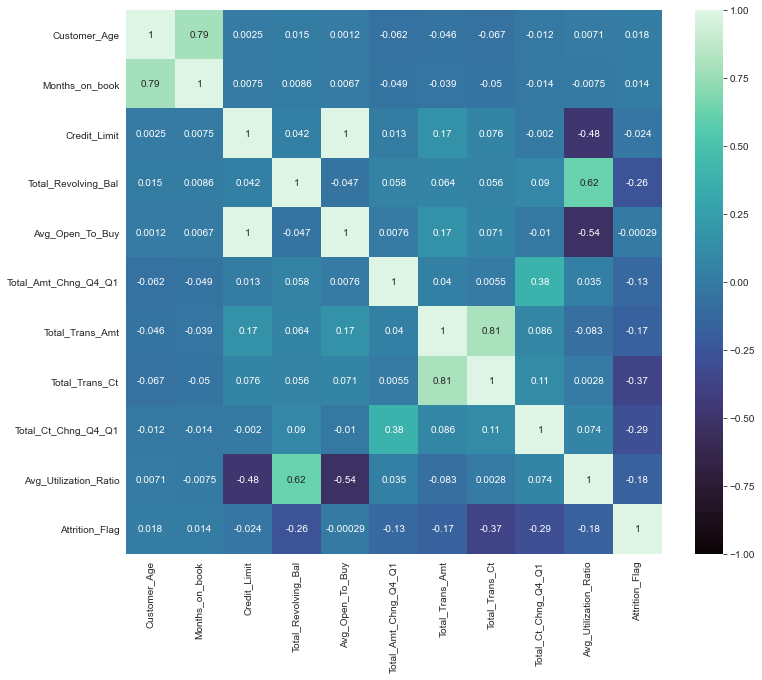

In [50]:
corr = pd.concat([eda_df, y], axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

Training

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [52]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    RandomForestClassifier()
]

for model in models:
    model.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [55]:
model_names = [
    "   Logistic Regression",
    "Support Vector Machine",
    "         Decision Tree",
    "        Neural Network",
    "         Random Forest"
]

for model, name in zip(models, model_names):
    print(name + ": {:.4f}%".format(model.score(X_test, y_test) * 100))

   Logistic Regression: 90.4574%
Support Vector Machine: 92.9911%
         Decision Tree: 93.6163%
        Neural Network: 93.6163%
         Random Forest: 95.7552%


In [54]:
#For the Random Forest the accuracy is 95.75%
#Logistic Regression: 90.4574%
#Support Vector Machine: 92.9911%
#Decision Tree: 93.6163%
# Neural Network: 93.6163%
#Random Forest: 95.7552%